## Observations and Insights

In [ ]:
## Please see the findings below for the comparison of Capomulin versus the other treatments used in the Pymaceutical's drug study. During my discovery, I have found that the study used Capomulin and Ramicane almost equally in dosage when giving it to the mice. When comparing the final tumor volume for both of these drugs, I was able to determine that the final tumor size in those mice treated with Capomulin was on average smaller than those treated with Ramicane. Finally, there was a strong correlation between the weight of the mice and the average tumor volume of the mice treated with Capomulin.

## Dependencies and starter code

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Extract data into new dataframe to more easily analyze
Drug_Regimen_df = combined_mouse_df.loc[:,["Drug Regimen"]]
Regimen_df = Drug_Regimen_df.groupby("Drug Regimen")
Regimen_df = Regimen_df.count()

Tumorvol_df = combined_mouse_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
Tumorvol = Tumorvol_df.groupby("Drug Regimen")

# Find the summary statistics and put into the dataframe created
Regimen_df["Mean Tumor Volume (mm3)"] = round(Tumorvol["Tumor Volume (mm3)"].mean(),2)
Regimen_df["Median Tumor Volume (mm3)"] = round(Tumorvol["Tumor Volume (mm3)"].median(),2)
Regimen_df ["Tumor Volume Variance"] = round(Tumorvol["Tumor Volume (mm3)"].var(ddof=0),2)
Regimen_df ["Tumor Volume Standard Deviation"] = round(Tumorvol["Tumor Volume (mm3)"].std(ddof=0),2)
Regimen_df ["Tumor Volume SEM"] = round(Tumorvol["Tumor Volume (mm3)"].sem(ddof=0),2)

Regimen_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.84,4.98,0.33
Ceftamin,52.59,51.78,39.07,6.25,0.47
Infubinol,52.88,51.82,42.89,6.55,0.49
Ketapril,55.24,53.70,68.19,8.26,0.60
Naftisol,54.33,52.51,65.82,8.11,0.59
Placebo,54.03,52.29,60.83,7.80,0.58
Propriva,52.32,50.85,42.09,6.49,0.51
Ramicane,40.22,40.67,23.38,4.84,0.32
Stelasyn,54.23,52.43,59.12,7.69,0.57


## Bar plots

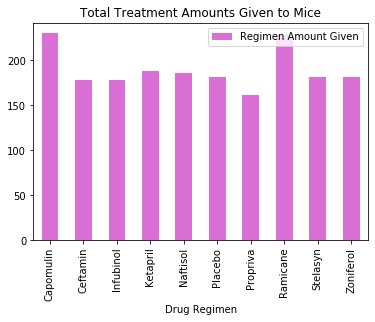

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Extract data into new dataframe to easily plot
treatment_df = combined_mouse_df.loc[:,["Mouse ID", "Drug Regimen"]]
treatment_df = treatment_df.groupby("Drug Regimen", as_index=False)
treatment_df = treatment_df.count()
treatment_df = treatment_df.rename(columns={"Mouse ID": "Regimen Amount Given"})

# Plot the bar chart 
bar_chart = treatment_df.plot.bar(x="Drug Regimen", y="Regimen Amount Given", rot=90, color="orchid")
plt.title("Total Treatment Amounts Given to Mice")

plt.show()

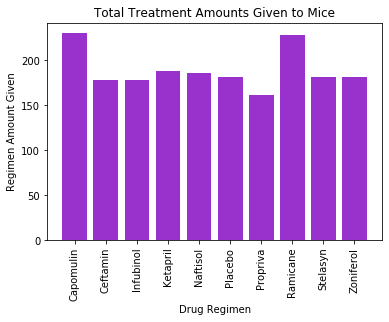

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Used above data frame to easily extract X and Y positions. Plot these positions using pyplot
y_pos = treatment_df["Regimen Amount Given"]
x_pos = treatment_df["Drug Regimen"]

plt.bar(x_pos, y_pos, color="darkorchid")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Amount Given")
plt.title("Total Treatment Amounts Given to Mice")
plt.xticks(rotation=90)

plt.show()

## Pie plots

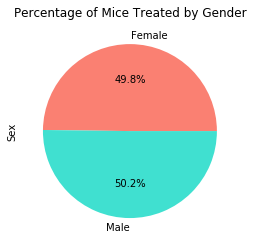

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Extract information into a dataframe to more easily plot
gender = combined_mouse_df.loc[:,["Mouse ID", "Sex"]]
gender_df = gender.drop_duplicates(["Mouse ID"])
gender_df = gender_df.groupby("Sex")
gender_df = gender_df["Sex"].count()
colors = ["salmon", "turquoise"]

# Plot the chart using pandas
pie_chart = gender_df.plot.pie(colors=colors, autopct='%1.1f%%', )
plt.title("Percentage of Mice Treated by Gender")

plt.show()


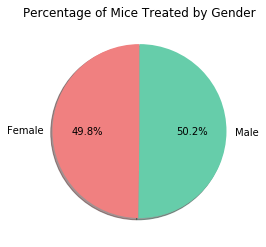

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels and plot from dataframe above using pyplot 
labels = ["Female", "Male"]
colors = ["lightcoral", "mediumaquamarine"]
plt.pie(gender_df,colors=colors,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Percentage of Mice Treated by Gender")

plt.show()

## Quartiles, outliers and boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Create a dataframe to pull out the top four treatments
final_tumor = combined_mouse_df.loc[:,["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor = final_tumor[final_tumor["Timepoint"] ==45]

final_tumor_treatment = final_tumor[final_tumor["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


final_tumor_treatment.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472


In [61]:
# Calculate IQR and determine if there are outliers from this dataframe

# Use numpy to create the quartiles and calculate IQR
qlower = np.percentile (final_tumor_treatment["Tumor Volume (mm3)"], 25)
qhigher = np.percentile(final_tumor_treatment["Tumor Volume (mm3)"],75)
iqr = (qhigher-qlower)
print(f"The IQR of tumor volume is: {iqr}")

# Determine if there are outliers
lower_bound = qlower - (1.5*iqr)
upper_bound = qhigher + (1.5*iqr)
print(f"There are no outliers in this dataframe")


The IQR of tumor volume is: 28.66218635
There are no outliers in this dataframe


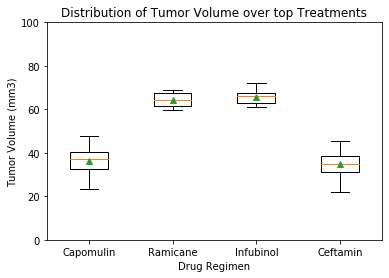

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a list for each drug regimen to show Tumor Volume for treatment and put into a dataframe
list_tumor = final_tumor_treatment.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list_df = pd.DataFrame(list_tumor)
tumor_volume = [Tvol for Tvol in list_df['Tumor Volume (mm3)']]

# Plot that dataframe into a boxplot
plt.boxplot(tumor_volume, labels=drug_labels, showmeans=True)
plt.title("Distribution of Tumor Volume over top Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0, 100)
plt.show()


## Line and scatter plots

Text(0, 0.5, 'Timepoint Given')

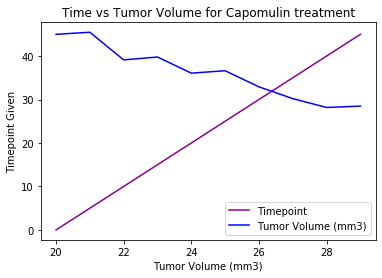

In [125]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Choose a mouse (x401) and extract information from original data into new dataframe 

Capomulin_mouse = combined_mouse_df[combined_mouse_df["Mouse ID"] == "x401"]
Capomulin_mouse_df = Capomulin_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_colors = ["darkmagenta", "blue"]
line_graph = Capomulin_mouse_df.plot.line(color=line_colors)
plt.title("Time vs Tumor Volume for Capomulin treatment")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint Given")


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume for Capomulin treatment')

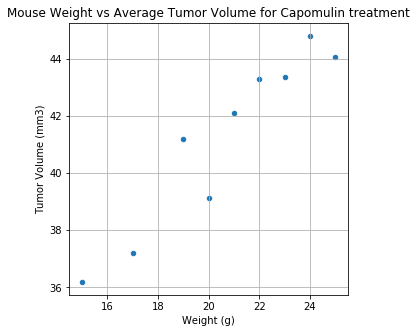

In [122]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_weight = combined_mouse_df[combined_mouse_df["Drug Regimen"] == "Capomulin"]
Capomulin_weight_df = Capomulin_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].reset_index()


average_weight = Capomulin_weight_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
average_weight_df = pd.DataFrame(average_weight).reset_index()

scatter_plot = average_weight_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid = True, figsize= (5,5))
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin treatment")

The correlation coefficient between weight and average tumor volume is 0.95


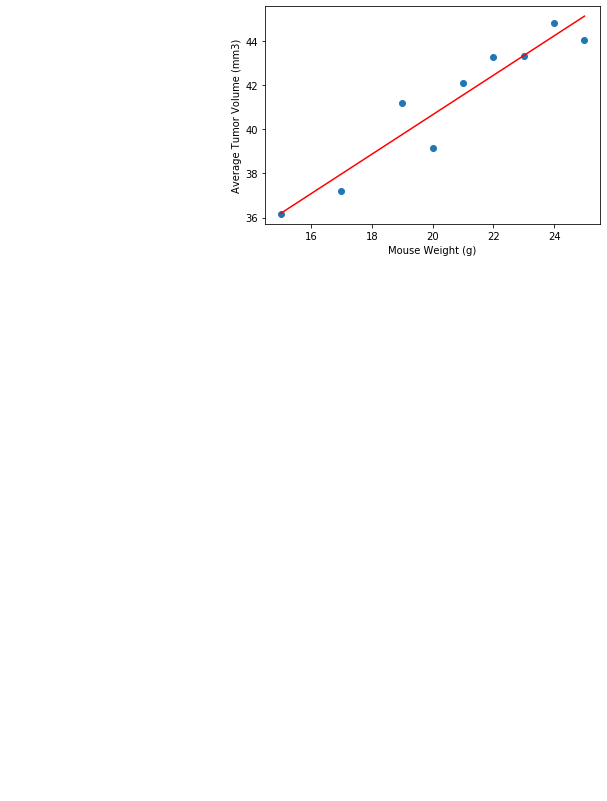

In [142]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight = average_weight_df["Weight (g)"]
tumorvolume = average_weight_df["Tumor Volume (mm3)"]
correlation = sts.pearsonr(weight,tumorvolume)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumorvolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumorvolume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation coefficient between weight and average tumor volume is {round(sts.pearsonr(weight,tumorvolume)[0],2)}")
plt.show()

